In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils.mea_analysis as mea
import re

## Todo:

- implement functional channel removal on plotting and pca
- look at attractive region with only good channels in pca plots
- try to do some cluster analysis on that

In [31]:
vdf = pd.read_csv("example_data/MEA002_postS_50V_V.csv",skiprows=22, sep="\t")
smudf = pd.read_csv("example_data/MEA002_postS_50V_SMU.csv",skiprows=21, sep="\t")
basepath = "example_data/MEA002_postS_50V_SMU.csv"

vdf = vdf.drop(vdf.index[46000:])
smudf = smudf.drop(smudf.index[230:])

In [32]:
smudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 3 columns):
X_Value     230 non-null float64
Untitled    230 non-null float64
Comment     0 non-null float64
dtypes: float64(3)
memory usage: 7.2 KB


In [33]:
vcols = []
for header in list(vdf):
    header = header.replace("Voltage_", "v")
    header = header.replace("Untitled", "current")
    header = header.replace("X_Value", "time")
    vcols.append(header)
vdf.columns = vcols
vdf["trel"] = vdf.time - vdf.time.iloc[0]
vdf.trel = pd.to_numeric(vdf.trel)
vdf = vdf.drop(['Comment'], axis=1)

smucols = []
for header in list(smudf):
    header = header.replace("Untitled", "current")
    header = header.replace("X_Value", "time")
    smucols.append(header)
smudf.columns = smucols
smudf["trel"] = smudf.time - smudf.time.iloc[0]
smudf.trel = pd.to_numeric(smudf.trel)
smudf = smudf.drop(['Comment'], axis=1)

V = False
if not (re.search("(\d+)V", basepath)):
     V = int(re.search("(\d+)mV", basepath).group(1))
elif not (re.search("(\d+)mV", basepath)):
        V = int(re.search("(\d+)V", basepath).group(1))
else:
    print("ERROR:couldnt detect conduction")
    print(basepath)
if V:
    smudf["voltage"] = V
    g0 = 7.75e-5  # quantum conductance
    smudf["conductance"] = smudf.current / smudf.voltage / g0

In [34]:
print(vdf.info())
print(smudf.info())
print(vdf.head())
print(smudf.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23000 entries, 0 to 22999
Data columns (total 18 columns):
time    23000 non-null float64
v0      23000 non-null float64
v1      23000 non-null float64
v2      23000 non-null float64
v3      23000 non-null float64
v4      23000 non-null float64
v5      23000 non-null float64
v6      23000 non-null float64
v7      23000 non-null float64
v8      23000 non-null float64
v9      23000 non-null float64
v10     23000 non-null float64
v11     23000 non-null float64
v12     23000 non-null float64
v13     23000 non-null float64
v14     23000 non-null float64
v15     23000 non-null float64
trel    23000 non-null float64
dtypes: float64(18)
memory usage: 3.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 5 columns):
time           230 non-null float64
current        230 non-null float64
trel           230 non-null float64
voltage        230 non-null int64
conductance    230 non-null float64
dtype

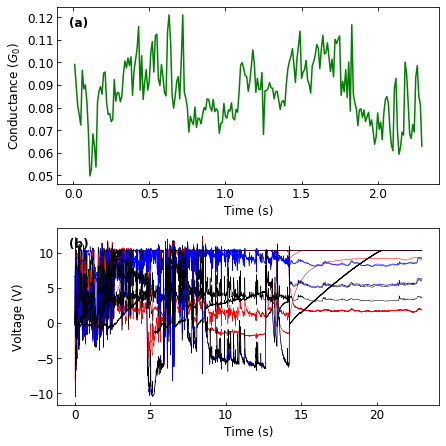

In [51]:
mea.plot_signal(vdf,smudf, remove_channels=[], show=True)

In [36]:
dg, iei =mea.analyze_events(smudf,gthresh=0.01)

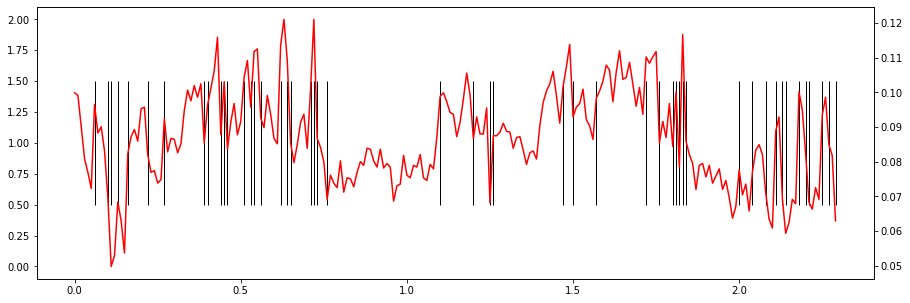

In [37]:
fig, ax = plt.subplots(nrows=1,figsize=(15,5))
ax.eventplot(dg[:,1],linewidth=1,color='k')
ax2=ax.twinx()
ax2.plot(smudf.trel,smudf.conductance,'r')

Text(0.5, 1.0, 'loglog interevent interval length histogram')

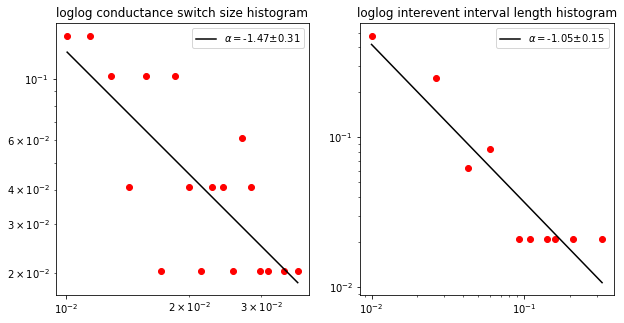

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
mea.plot_loglog(dg[:,0],axes[0])
mea.plot_loglog(iei,axes[1])
axes[0].set_title("loglog conductance switch size histogram")
axes[1].set_title("loglog interevent interval length histogram")

ValueError: cannot reshape array of size 18 into shape (4,4)

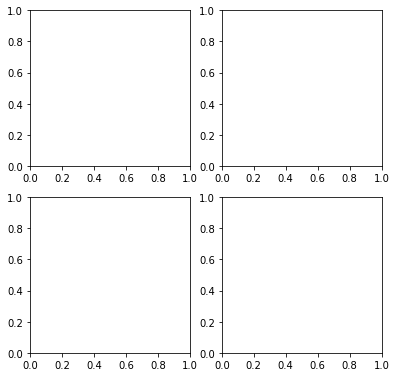

In [53]:

resd = vdf.iloc[:,3:-1].values
resd = resd[10000:11000]
mea.plot_principal_components(resd, displaynan = [4,6], show = True, ends = True)
plt.savefig('plots/MEA001_postS_5V_SMU.png')

In [40]:
print(vdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23000 entries, 0 to 22999
Data columns (total 18 columns):
time    23000 non-null float64
v0      23000 non-null float64
v1      23000 non-null float64
v2      23000 non-null float64
v3      23000 non-null float64
v4      23000 non-null float64
v5      23000 non-null float64
v6      23000 non-null float64
v7      23000 non-null float64
v8      23000 non-null float64
v9      23000 non-null float64
v10     23000 non-null float64
v11     23000 non-null float64
v12     23000 non-null float64
v13     23000 non-null float64
v14     23000 non-null float64
v15     23000 non-null float64
trel    23000 non-null float64
dtypes: float64(18)
memory usage: 3.3 MB
None


In [ ]:
print(vdf.head())